In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
# read yf3data.csv
df_yf = pd.read_csv('yf3data.csv')
df_yf

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600,0.000000
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800,0.006648
...,...,...,...,...,...,...,...,...,...
2457979,FDP,2020-12-23,24.200001,25.049999,24.200001,24.799999,23.759726,148200,0.023102
2457980,FDP,2020-12-24,25.010000,25.030001,24.620001,25.010000,23.960918,93600,0.008468
2457981,FDP,2020-12-28,25.180000,25.650000,25.120001,25.290001,24.229174,133100,0.011196
2457982,FDP,2020-12-29,25.170000,25.280001,24.230000,24.309999,23.290279,135500,-0.038751


In [3]:
# number of unique tickers in df_yf
print('Num of unique tickers:', df_yf['Ticker'].unique().shape[0])

Num of unique tickers: 888


In [4]:
# check data types
df_yf.dtypes

Ticker            object
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
Volume             int64
Daily Returns    float64
dtype: object

In [5]:
# transform date column into year, month and day columns
dates = df_yf['Date'].values
df_yf['Date'] = np.array(dates, dtype='datetime64[D]')
print("---Transformed Date Column")

df_yf.head()

---Transformed Date Column


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600,0.000000
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800,0.006648


In [6]:
# select columns
int_col = ['Ticker', 'Date', 'Daily Returns']
df_yf = df_yf[int_col]
df_yf

,Ticker,Date,Daily Returns
0,AAPL,2010-01-04,0.000000
1,AAPL,2010-01-05,0.001729
2,AAPL,2010-01-06,-0.015906
3,AAPL,2010-01-07,-0.001849
4,AAPL,2010-01-08,0.006648
...,...,...,...
2457979,FDP,2020-12-23,0.023102
2457980,FDP,2020-12-24,0.008468
2457981,FDP,2020-12-28,0.011196
2457982,FDP,2020-12-29,-0.038751


In [7]:
# Start Date
print('Start Date:', df_yf['Date'].min())

# End Date
print('End Date:', df_yf['Date'].max())

Start Date: 2010-01-04 00:00:00
End Date: 2020-12-30 00:00:00


In [8]:
# Retrieve S&P 500 Returns between 2010-01-04 and 2020-12-30
sp500 = pd.read_csv('snp500historicaldata.csv')
sp500.head()

,Date,Price,Open,High,Low
0,2010-01-04,1132.99,1116.56,1133.87,1116.56
1,2010-01-05,1136.52,1132.66,1136.63,1129.66
2,2010-01-06,1137.14,1135.71,1139.19,1133.95
3,2010-01-07,1141.69,1136.27,1142.46,1131.32
4,2010-01-08,1144.98,1140.52,1145.39,1136.22


In [9]:
# convert Date to datetime64[ns] data type
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object

In [10]:
# function to calculate daily returns for portfolio, ticker
def dailyReturns2(df, col_name):
    # calculate daily returns for each ticker using vectorized operations
    df[col_name] = (df['Price'] / df['Price'].shift(1) - 1).fillna(0)
    return df

# Add S&P Daily Returns Column
dailyReturns2(sp500, 'SP500 Returns')
sp500

,Date,Price,Open,High,Low,SP500 Returns
0,2010-01-04,1132.99,1116.56,1133.87,1116.56,0.000000
1,2010-01-05,1136.52,1132.66,1136.63,1129.66,0.003116
2,2010-01-06,1137.14,1135.71,1139.19,1133.95,0.000546
3,2010-01-07,1141.69,1136.27,1142.46,1131.32,0.004001
4,2010-01-08,1144.98,1140.52,1145.39,1136.22,0.002882
...,...,...,...,...,...,...
2763,2020-12-23,3690.01,3693.42,3711.24,3689.28,0.000746
2764,2020-12-24,3703.06,3694.03,3703.82,3689.32,0.003537
2765,2020-12-28,3735.36,3723.03,3740.51,3723.03,0.008723
2766,2020-12-29,3727.04,3750.01,3756.12,3723.31,-0.002227


In [11]:
# Select Date and S&P500 Daily Returns columns
sp500Returns = sp500[['Date', 'SP500 Returns']]
sp500Returns.head()

,Date,SP500 Returns
0,2010-01-04,0.000000
1,2010-01-05,0.003116
2,2010-01-06,0.000546
3,2010-01-07,0.004001
4,2010-01-08,0.002882


In [12]:
# Constants
RISK_FREE_RATE = 0.02/252

# set index to Date
sp500Returns = sp500Returns.set_index('Date')
df_yf = df_yf.set_index('Date')

In [13]:
# show SP500Return DataFrame for merging
sp500Returns

,SP500 Returns
Date,
2010-01-04,0.000000
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882
...,...
2020-12-23,0.000746
2020-12-24,0.003537
2020-12-28,0.008723


In [14]:
# show df_yf DataFrame for merging
df_yf

,Ticker,Daily Returns
Date,,
2010-01-04,AAPL,0.000000
2010-01-05,AAPL,0.001729
2010-01-06,AAPL,-0.015906
2010-01-07,AAPL,-0.001849
2010-01-08,AAPL,0.006648
...,...,...
2020-12-23,FDP,0.023102
2020-12-24,FDP,0.008468
2020-12-28,FDP,0.011196


In [15]:
# merge df_yf and sp500Returns
merge = df_yf.merge(sp500Returns, how='left', left_index=True, right_index=True)

# reset index
merge = merge.reset_index()
merge

,Date,Ticker,Daily Returns,SP500 Returns
0,2010-01-04,AAPL,0.000000,0.000000
1,2010-01-04,MSFT,0.000000,0.000000
2,2010-01-04,GOOGL,0.000000,0.000000
3,2010-01-04,AMZN,0.000000,0.000000
4,2010-01-04,XOM,0.000000,0.000000
...,...,...,...,...
2457979,2020-12-30,PRAA,0.030580,0.001342
2457980,2020-12-30,IVR,0.000000,0.001342
2457981,2020-12-30,ABM,0.000530,0.001342
2457982,2020-12-30,BRC,0.015211,0.001342


In [16]:
# add market risk premium
merge['Market Risk Premium'] = merge['SP500 Returns'] - RISK_FREE_RATE
merge

,Date,Ticker,Daily Returns,SP500 Returns,Market Risk Premium
0,2010-01-04,AAPL,0.000000,0.000000,-0.000079
1,2010-01-04,MSFT,0.000000,0.000000,-0.000079
2,2010-01-04,GOOGL,0.000000,0.000000,-0.000079
3,2010-01-04,AMZN,0.000000,0.000000,-0.000079
4,2010-01-04,XOM,0.000000,0.000000,-0.000079
...,...,...,...,...,...
2457979,2020-12-30,PRAA,0.030580,0.001342,0.001262
2457980,2020-12-30,IVR,0.000000,0.001342,0.001262
2457981,2020-12-30,ABM,0.000530,0.001342,0.001262
2457982,2020-12-30,BRC,0.015211,0.001342,0.001262


In [17]:
# retrieve tickers
tickers = merge['Ticker'].unique()
tickers

array(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'XOM', 'JNJ', 'JPM', 'WMT', 'PG',
       'WFC', 'CVX', 'T', 'GE', 'PFE', 'BAC', 'V', 'KO', 'VZ', 'TM',
       'IBM', 'ORCL', 'INTC', 'MRK', 'CSCO', 'HD', 'DIS', 'C', 'PEP',
       'CMCSA', 'PM', 'UNH', 'MA', 'NVO', 'MCD', 'BA', 'LIN', 'AMGN',
       'QCOM', 'SLB', 'RTX', 'MMM', 'MO', 'ABT', 'GILD', 'MDT', 'UPS',
       'NKE', 'BMY', 'AZN', 'UNP', 'HON', 'LLY', 'CVS', 'AXP', 'GS',
       'ACN', 'COP', 'USB', 'COST', 'TXN', 'SBUX', 'MDLZ', 'DD', 'ADBE',
       'LMT', 'CAT', 'CRM', 'MS', 'NFLX', 'OXY', 'DHR', 'LOW', 'TMO',
       'BKNG', 'NVDA', 'HMC', 'WBA', 'NEE', 'CL', 'BIDU', 'AIG', 'AVGO',
       'BLK', 'BIIB', 'EPD', 'ASML', 'DUK', 'ABB', 'SPG', 'AMT', 'F',
       'MET', 'PNC', 'BCS', 'HPQ', 'SO', 'EBAY', 'TJX', 'CB', 'EOG',
       'LVS', 'VMW', 'D', 'TGT', 'FDX', 'ADP', 'SYK', 'GD', 'BK', 'ENB',
       'EMR', 'SCHW', 'KMB', 'ITW', 'DE', 'COF', 'CME', 'BDX', 'CSX',
       'EL', 'HAL', 'PRU', 'NOC', 'TMUS', 'TRP', 'BAX', 'CCL', 'INTU',
       '

In [18]:
# import relevant library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# function to retrieve p value
def find_p_value(X, y):
    f_stat, p_val = f_regression(X, y)
    return p_val[0]

# CAPM function
def linearReg(ticker, dataset):
    # Split Data
    df = dataset[dataset['Ticker'] == ticker]
    train_set, test_set= np.split(df, [int(.8 *df.shape[0])])
    
    # Select Independent and Dependent Variables
    X_train = train_set[train_set['Ticker'] == ticker][['Market Risk Premium']]
    y_train = train_set[train_set['Ticker'] == ticker]['Daily Returns']
    
    # Create Linear Regression Model
    CAPM_model = LinearRegression()

    # Train Model
    CAPM_model.fit(X_train, y_train)
    
    return CAPM_model.coef_[0], CAPM_model.intercept_, find_p_value(X_train, y_train)

In [19]:
beta_dict = {'Ticker': tickers, 'MRP Beta': [], 'Alpha': [], 'P Value': []}
count = 0

for ticker in tickers:
    beta, alpha, p_value = linearReg(ticker, merge)
    beta_dict['MRP Beta'].append(beta)
    beta_dict['Alpha'].append(alpha)
    beta_dict['P Value'].append(p_value)
    count += 1
    print(f'---Completed {ticker} => count: {count}')
    
df_beta = pd.DataFrame(beta_dict)

---Completed AAPL => count: 1
---Completed MSFT => count: 2
---Completed GOOGL => count: 3
---Completed AMZN => count: 4
---Completed XOM => count: 5
---Completed JNJ => count: 6
---Completed JPM => count: 7
---Completed WMT => count: 8
---Completed PG => count: 9
---Completed WFC => count: 10
---Completed CVX => count: 11
---Completed T => count: 12
---Completed GE => count: 13
---Completed PFE => count: 14
---Completed BAC => count: 15
---Completed V => count: 16
---Completed KO => count: 17
---Completed VZ => count: 18
---Completed TM => count: 19
---Completed IBM => count: 20
---Completed ORCL => count: 21
---Completed INTC => count: 22
---Completed MRK => count: 23
---Completed CSCO => count: 24
---Completed HD => count: 25
---Completed DIS => count: 26
---Completed C => count: 27
---Completed PEP => count: 28
---Completed CMCSA => count: 29
---Completed PM => count: 30
---Completed UNH => count: 31
---Completed MA => count: 32
---Completed NVO => count: 33
---Completed MCD => cou

---Completed PAA => count: 271
---Completed GWW => count: 272
---Completed CLX => count: 273
---Completed CMG => count: 274
---Completed EVRG => count: 275
---Completed CAG => count: 276
---Completed DLR => count: 277
---Completed FAST => count: 278
---Completed BBY => count: 279
---Completed OKE => count: 280
---Completed LHX => count: 281
---Completed CPB => count: 282
---Completed WYNN => count: 283
---Completed NTAP => count: 284
---Completed VRSK => count: 285
---Completed RF => count: 286
---Completed GPN => count: 287
---Completed MMP => count: 288
---Completed KEY => count: 289
---Completed HST => count: 290
---Completed EXPE => count: 291
---Completed KLAC => count: 292
---Completed MCHP => count: 293
---Completed AME => count: 294
---Completed TDG => count: 295
---Completed O => count: 296
---Completed M => count: 297
---Completed DOV => count: 298
---Completed STX => count: 299
---Completed NLY => count: 300
---Completed GPC => count: 301
---Completed TPR => count: 302
---Co

---Completed LAZ => count: 535
---Completed AN => count: 536
---Completed GGG => count: 537
---Completed LEG => count: 538
---Completed OHI => count: 539
---Completed G => count: 540
---Completed WSM => count: 541
---Completed RNR => count: 542
---Completed TYL => count: 543
---Completed AIZ => count: 544
---Completed SUI => count: 545
---Completed TDY => count: 546
---Completed SIG => count: 547
---Completed CBSH => count: 548
---Completed ITT => count: 549
---Completed MIDD => count: 550
---Completed DKS => count: 551
---Completed MDU => count: 552
---Completed NFG => count: 553
---Completed GNTX => count: 554
---Completed CLB => count: 555
---Completed AGCO => count: 556
---Completed HUN => count: 557
---Completed AXS => count: 558
---Completed ATR => count: 559
---Completed RGLD => count: 560
---Completed CFR => count: 561
---Completed LECO => count: 562
---Completed CGNX => count: 563
---Completed BOKF => count: 564
---Completed DEI => count: 565
---Completed TTC => count: 566
---

---Completed EAT => count: 800
---Completed DLX => count: 801
---Completed GATX => count: 802
---Completed PNFP => count: 803
---Completed NWE => count: 804
---Completed GEF => count: 805
---Completed PSMT => count: 806
---Completed GEO => count: 807
---Completed CRUS => count: 808
---Completed HELE => count: 809
---Completed VSH => count: 810
---Completed WAFD => count: 811
---Completed AVA => count: 812
---Completed GBCI => count: 813
---Completed UNF => count: 814
---Completed ARLP => count: 815
---Completed CRS => count: 816
---Completed CEQP => count: 817
---Completed SHOO => count: 818
---Completed TGI => count: 819
---Completed BCO => count: 820
---Completed SIGI => count: 821
---Completed TPL => count: 822
---Completed NUVA => count: 823
---Completed HCSG => count: 824
---Completed CATY => count: 825
---Completed ICUI => count: 826
---Completed SMTC => count: 827
---Completed JACK => count: 828
---Completed WOR => count: 829
---Completed SPB => count: 830
---Completed DDD => co

In [20]:
# view df_beta
df_beta

,Ticker,MRP Beta,Alpha,P Value
0,AAPL,0.966667,0.000659,1.319716e-186
1,MSFT,1.025243,0.000293,1.343606e-287
2,GOOGL,1.017210,0.000312,2.688614e-237
3,AMZN,1.121278,0.000951,6.182274e-164
4,XOM,0.913782,-0.000200,0.000000e+00
...,...,...,...,...
883,PRAA,1.102409,0.000189,2.002599e-102
884,IVR,0.715207,-0.000361,1.350398e-123
885,ABM,1.049301,-0.000069,3.284780e-220
886,BRC,1.124212,-0.000135,2.679212e-208


In [21]:
# remove rows with p-value > 0.05
df_beta = df_beta[df_beta['P Value'] < 0.05]
df_beta

,Ticker,MRP Beta,Alpha,P Value
0,AAPL,0.966667,0.000659,1.319716e-186
1,MSFT,1.025243,0.000293,1.343606e-287
2,GOOGL,1.017210,0.000312,2.688614e-237
3,AMZN,1.121278,0.000951,6.182274e-164
4,XOM,0.913782,-0.000200,0.000000e+00
...,...,...,...,...
883,PRAA,1.102409,0.000189,2.002599e-102
884,IVR,0.715207,-0.000361,1.350398e-123
885,ABM,1.049301,-0.000069,3.284780e-220
886,BRC,1.124212,-0.000135,2.679212e-208


In [22]:
# select stocks to buy/sell
long_short_select = []
alpha_values = df_beta['Alpha'].values
for alpha in alpha_values:
    if alpha >= RISK_FREE_RATE:
        long_short_select.append('Buy')
    else:
        long_short_select.append('Sell')
        
df_beta['Position'] = long_short_select
df_beta

,Ticker,MRP Beta,Alpha,P Value,Position
0,AAPL,0.966667,0.000659,1.319716e-186,Buy
1,MSFT,1.025243,0.000293,1.343606e-287,Buy
2,GOOGL,1.017210,0.000312,2.688614e-237,Buy
3,AMZN,1.121278,0.000951,6.182274e-164,Buy
4,XOM,0.913782,-0.000200,0.000000e+00,Sell
...,...,...,...,...,...
883,PRAA,1.102409,0.000189,2.002599e-102,Buy
884,IVR,0.715207,-0.000361,1.350398e-123,Sell
885,ABM,1.049301,-0.000069,3.284780e-220,Sell
886,BRC,1.124212,-0.000135,2.679212e-208,Sell


In [23]:
# count number of buy and sell 
num_buy = df_beta[df_beta['Position'] == 'Buy'].shape[0]
num_sell = df_beta[df_beta['Position'] == 'Sell'].shape[0]

print('Number of Buy :', num_buy)
print('Number of Sell :', num_sell)

Number of Buy : 555
Number of Sell : 333


In [24]:
# set index
df_beta = df_beta.set_index('Ticker')
merge = merge.set_index('Ticker')

# combine merge and df_beta
merge = merge.merge(df_beta, how='left', left_index=True, right_index=True)
merge = merge.reset_index()
merge.head()

,Ticker,Date,Daily Returns,SP500 Returns,Market Risk Premium,MRP Beta,Alpha,P Value,Position
0,A,2010-01-04,0.000000,0.000000,-0.000079,1.434627,0.000118,0.0,Buy
1,A,2010-01-05,-0.010863,0.003116,0.003036,1.434627,0.000118,0.0,Buy
2,A,2010-01-06,-0.003553,0.000546,0.000466,1.434627,0.000118,0.0,Buy
3,A,2010-01-07,-0.001297,0.004001,0.003922,1.434627,0.000118,0.0,Buy
4,A,2010-01-08,-0.000325,0.002882,0.002802,1.434627,0.000118,0.0,Buy


In [25]:
# add Expected Return (CAPM)
merge['Expected Return'] = merge['Alpha'] + merge['MRP Beta']*merge['Market Risk Premium']
merge.head()

,Ticker,Date,Daily Returns,SP500 Returns,Market Risk Premium,MRP Beta,Alpha,P Value,Position,Expected Return
0,A,2010-01-04,0.000000,0.000000,-0.000079,1.434627,0.000118,0.0,Buy,0.000004
1,A,2010-01-05,-0.010863,0.003116,0.003036,1.434627,0.000118,0.0,Buy,0.004474
2,A,2010-01-06,-0.003553,0.000546,0.000466,1.434627,0.000118,0.0,Buy,0.000787
3,A,2010-01-07,-0.001297,0.004001,0.003922,1.434627,0.000118,0.0,Buy,0.005744
4,A,2010-01-08,-0.000325,0.002882,0.002802,1.434627,0.000118,0.0,Buy,0.004138


In [26]:
# retrieve unique dates
dates = merge['Date'].unique()

# calcualte portfolio returns
pf_returns_dict = {'Date': dates, 'Portfolio Returns': []}
for date in dates:
    temp_df = merge[merge['Date'] == date][['Position', 'Expected Return']]
    returns = temp_df[temp_df['Position'] == 'Buy']['Expected Return'].mean() - temp_df[temp_df['Position'] == 'Sell']['Expected Return'].mean()
    pf_returns_dict['Portfolio Returns'].append(returns)
    print('---Completed', date)

df_portfolioReturns = pd.DataFrame(pf_returns_dict)
df_portfolioReturns

---Completed 2010-01-04T00:00:00.000000000
---Completed 2010-01-05T00:00:00.000000000
---Completed 2010-01-06T00:00:00.000000000
---Completed 2010-01-07T00:00:00.000000000
---Completed 2010-01-08T00:00:00.000000000
---Completed 2010-01-11T00:00:00.000000000
---Completed 2010-01-12T00:00:00.000000000
---Completed 2010-01-13T00:00:00.000000000
---Completed 2010-01-14T00:00:00.000000000
---Completed 2010-01-15T00:00:00.000000000
---Completed 2010-01-19T00:00:00.000000000
---Completed 2010-01-20T00:00:00.000000000
---Completed 2010-01-21T00:00:00.000000000
---Completed 2010-01-22T00:00:00.000000000
---Completed 2010-01-25T00:00:00.000000000
---Completed 2010-01-26T00:00:00.000000000
---Completed 2010-01-27T00:00:00.000000000
---Completed 2010-01-28T00:00:00.000000000
---Completed 2010-01-29T00:00:00.000000000
---Completed 2010-02-01T00:00:00.000000000
---Completed 2010-02-02T00:00:00.000000000
---Completed 2010-02-03T00:00:00.000000000
---Completed 2010-02-04T00:00:00.000000000
---Complete

---Completed 2010-11-10T00:00:00.000000000
---Completed 2010-11-11T00:00:00.000000000
---Completed 2010-11-12T00:00:00.000000000
---Completed 2010-11-15T00:00:00.000000000
---Completed 2010-11-16T00:00:00.000000000
---Completed 2010-11-17T00:00:00.000000000
---Completed 2010-11-18T00:00:00.000000000
---Completed 2010-11-19T00:00:00.000000000
---Completed 2010-11-22T00:00:00.000000000
---Completed 2010-11-23T00:00:00.000000000
---Completed 2010-11-24T00:00:00.000000000
---Completed 2010-11-26T00:00:00.000000000
---Completed 2010-11-29T00:00:00.000000000
---Completed 2010-11-30T00:00:00.000000000
---Completed 2010-12-01T00:00:00.000000000
---Completed 2010-12-02T00:00:00.000000000
---Completed 2010-12-03T00:00:00.000000000
---Completed 2010-12-06T00:00:00.000000000
---Completed 2010-12-07T00:00:00.000000000
---Completed 2010-12-08T00:00:00.000000000
---Completed 2010-12-09T00:00:00.000000000
---Completed 2010-12-10T00:00:00.000000000
---Completed 2010-12-13T00:00:00.000000000
---Complete

---Completed 2011-08-18T00:00:00.000000000
---Completed 2011-08-19T00:00:00.000000000
---Completed 2011-08-22T00:00:00.000000000
---Completed 2011-08-23T00:00:00.000000000
---Completed 2011-08-24T00:00:00.000000000
---Completed 2011-08-25T00:00:00.000000000
---Completed 2011-08-26T00:00:00.000000000
---Completed 2011-08-29T00:00:00.000000000
---Completed 2011-08-30T00:00:00.000000000
---Completed 2011-08-31T00:00:00.000000000
---Completed 2011-09-01T00:00:00.000000000
---Completed 2011-09-02T00:00:00.000000000
---Completed 2011-09-06T00:00:00.000000000
---Completed 2011-09-07T00:00:00.000000000
---Completed 2011-09-08T00:00:00.000000000
---Completed 2011-09-09T00:00:00.000000000
---Completed 2011-09-12T00:00:00.000000000
---Completed 2011-09-13T00:00:00.000000000
---Completed 2011-09-14T00:00:00.000000000
---Completed 2011-09-15T00:00:00.000000000
---Completed 2011-09-16T00:00:00.000000000
---Completed 2011-09-19T00:00:00.000000000
---Completed 2011-09-20T00:00:00.000000000
---Complete

---Completed 2012-05-29T00:00:00.000000000
---Completed 2012-05-30T00:00:00.000000000
---Completed 2012-05-31T00:00:00.000000000
---Completed 2012-06-01T00:00:00.000000000
---Completed 2012-06-04T00:00:00.000000000
---Completed 2012-06-05T00:00:00.000000000
---Completed 2012-06-06T00:00:00.000000000
---Completed 2012-06-07T00:00:00.000000000
---Completed 2012-06-08T00:00:00.000000000
---Completed 2012-06-11T00:00:00.000000000
---Completed 2012-06-12T00:00:00.000000000
---Completed 2012-06-13T00:00:00.000000000
---Completed 2012-06-14T00:00:00.000000000
---Completed 2012-06-15T00:00:00.000000000
---Completed 2012-06-18T00:00:00.000000000
---Completed 2012-06-19T00:00:00.000000000
---Completed 2012-06-20T00:00:00.000000000
---Completed 2012-06-21T00:00:00.000000000
---Completed 2012-06-22T00:00:00.000000000
---Completed 2012-06-25T00:00:00.000000000
---Completed 2012-06-26T00:00:00.000000000
---Completed 2012-06-27T00:00:00.000000000
---Completed 2012-06-28T00:00:00.000000000
---Complete

---Completed 2013-03-18T00:00:00.000000000
---Completed 2013-03-19T00:00:00.000000000
---Completed 2013-03-20T00:00:00.000000000
---Completed 2013-03-21T00:00:00.000000000
---Completed 2013-03-22T00:00:00.000000000
---Completed 2013-03-25T00:00:00.000000000
---Completed 2013-03-26T00:00:00.000000000
---Completed 2013-03-27T00:00:00.000000000
---Completed 2013-03-28T00:00:00.000000000
---Completed 2013-04-01T00:00:00.000000000
---Completed 2013-04-02T00:00:00.000000000
---Completed 2013-04-03T00:00:00.000000000
---Completed 2013-04-04T00:00:00.000000000
---Completed 2013-04-05T00:00:00.000000000
---Completed 2013-04-08T00:00:00.000000000
---Completed 2013-04-09T00:00:00.000000000
---Completed 2013-04-10T00:00:00.000000000
---Completed 2013-04-11T00:00:00.000000000
---Completed 2013-04-12T00:00:00.000000000
---Completed 2013-04-15T00:00:00.000000000
---Completed 2013-04-16T00:00:00.000000000
---Completed 2013-04-17T00:00:00.000000000
---Completed 2013-04-18T00:00:00.000000000
---Complete

---Completed 2013-12-27T00:00:00.000000000
---Completed 2013-12-30T00:00:00.000000000
---Completed 2013-12-31T00:00:00.000000000
---Completed 2014-01-02T00:00:00.000000000
---Completed 2014-01-03T00:00:00.000000000
---Completed 2014-01-06T00:00:00.000000000
---Completed 2014-01-07T00:00:00.000000000
---Completed 2014-01-08T00:00:00.000000000
---Completed 2014-01-09T00:00:00.000000000
---Completed 2014-01-10T00:00:00.000000000
---Completed 2014-01-13T00:00:00.000000000
---Completed 2014-01-14T00:00:00.000000000
---Completed 2014-01-15T00:00:00.000000000
---Completed 2014-01-16T00:00:00.000000000
---Completed 2014-01-17T00:00:00.000000000
---Completed 2014-01-21T00:00:00.000000000
---Completed 2014-01-22T00:00:00.000000000
---Completed 2014-01-23T00:00:00.000000000
---Completed 2014-01-24T00:00:00.000000000
---Completed 2014-01-27T00:00:00.000000000
---Completed 2014-01-28T00:00:00.000000000
---Completed 2014-01-29T00:00:00.000000000
---Completed 2014-01-30T00:00:00.000000000
---Complete

---Completed 2014-10-08T00:00:00.000000000
---Completed 2014-10-09T00:00:00.000000000
---Completed 2014-10-10T00:00:00.000000000
---Completed 2014-10-13T00:00:00.000000000
---Completed 2014-10-14T00:00:00.000000000
---Completed 2014-10-15T00:00:00.000000000
---Completed 2014-10-16T00:00:00.000000000
---Completed 2014-10-17T00:00:00.000000000
---Completed 2014-10-20T00:00:00.000000000
---Completed 2014-10-21T00:00:00.000000000
---Completed 2014-10-22T00:00:00.000000000
---Completed 2014-10-23T00:00:00.000000000
---Completed 2014-10-24T00:00:00.000000000
---Completed 2014-10-27T00:00:00.000000000
---Completed 2014-10-28T00:00:00.000000000
---Completed 2014-10-29T00:00:00.000000000
---Completed 2014-10-30T00:00:00.000000000
---Completed 2014-10-31T00:00:00.000000000
---Completed 2014-11-03T00:00:00.000000000
---Completed 2014-11-04T00:00:00.000000000
---Completed 2014-11-05T00:00:00.000000000
---Completed 2014-11-06T00:00:00.000000000
---Completed 2014-11-07T00:00:00.000000000
---Complete

---Completed 2015-07-27T00:00:00.000000000
---Completed 2015-07-28T00:00:00.000000000
---Completed 2015-07-29T00:00:00.000000000
---Completed 2015-07-30T00:00:00.000000000
---Completed 2015-07-31T00:00:00.000000000
---Completed 2015-08-03T00:00:00.000000000
---Completed 2015-08-04T00:00:00.000000000
---Completed 2015-08-05T00:00:00.000000000
---Completed 2015-08-06T00:00:00.000000000
---Completed 2015-08-07T00:00:00.000000000
---Completed 2015-08-10T00:00:00.000000000
---Completed 2015-08-11T00:00:00.000000000
---Completed 2015-08-12T00:00:00.000000000
---Completed 2015-08-13T00:00:00.000000000
---Completed 2015-08-14T00:00:00.000000000
---Completed 2015-08-17T00:00:00.000000000
---Completed 2015-08-18T00:00:00.000000000
---Completed 2015-08-19T00:00:00.000000000
---Completed 2015-08-20T00:00:00.000000000
---Completed 2015-08-21T00:00:00.000000000
---Completed 2015-08-24T00:00:00.000000000
---Completed 2015-08-25T00:00:00.000000000
---Completed 2015-08-26T00:00:00.000000000
---Complete

---Completed 2016-05-31T00:00:00.000000000
---Completed 2016-06-01T00:00:00.000000000
---Completed 2016-06-02T00:00:00.000000000
---Completed 2016-06-03T00:00:00.000000000
---Completed 2016-06-06T00:00:00.000000000
---Completed 2016-06-07T00:00:00.000000000
---Completed 2016-06-08T00:00:00.000000000
---Completed 2016-06-09T00:00:00.000000000
---Completed 2016-06-10T00:00:00.000000000
---Completed 2016-06-13T00:00:00.000000000
---Completed 2016-06-14T00:00:00.000000000
---Completed 2016-06-15T00:00:00.000000000
---Completed 2016-06-16T00:00:00.000000000
---Completed 2016-06-17T00:00:00.000000000
---Completed 2016-06-20T00:00:00.000000000
---Completed 2016-06-21T00:00:00.000000000
---Completed 2016-06-22T00:00:00.000000000
---Completed 2016-06-23T00:00:00.000000000
---Completed 2016-06-24T00:00:00.000000000
---Completed 2016-06-27T00:00:00.000000000
---Completed 2016-06-28T00:00:00.000000000
---Completed 2016-06-29T00:00:00.000000000
---Completed 2016-06-30T00:00:00.000000000
---Complete

---Completed 2017-03-10T00:00:00.000000000
---Completed 2017-03-13T00:00:00.000000000
---Completed 2017-03-14T00:00:00.000000000
---Completed 2017-03-15T00:00:00.000000000
---Completed 2017-03-16T00:00:00.000000000
---Completed 2017-03-17T00:00:00.000000000
---Completed 2017-03-20T00:00:00.000000000
---Completed 2017-03-21T00:00:00.000000000
---Completed 2017-03-22T00:00:00.000000000
---Completed 2017-03-23T00:00:00.000000000
---Completed 2017-03-24T00:00:00.000000000
---Completed 2017-03-27T00:00:00.000000000
---Completed 2017-03-28T00:00:00.000000000
---Completed 2017-03-29T00:00:00.000000000
---Completed 2017-03-30T00:00:00.000000000
---Completed 2017-03-31T00:00:00.000000000
---Completed 2017-04-03T00:00:00.000000000
---Completed 2017-04-04T00:00:00.000000000
---Completed 2017-04-05T00:00:00.000000000
---Completed 2017-04-06T00:00:00.000000000
---Completed 2017-04-07T00:00:00.000000000
---Completed 2017-04-10T00:00:00.000000000
---Completed 2017-04-11T00:00:00.000000000
---Complete

---Completed 2018-01-09T00:00:00.000000000
---Completed 2018-01-10T00:00:00.000000000
---Completed 2018-01-11T00:00:00.000000000
---Completed 2018-01-12T00:00:00.000000000
---Completed 2018-01-16T00:00:00.000000000
---Completed 2018-01-17T00:00:00.000000000
---Completed 2018-01-18T00:00:00.000000000
---Completed 2018-01-19T00:00:00.000000000
---Completed 2018-01-22T00:00:00.000000000
---Completed 2018-01-23T00:00:00.000000000
---Completed 2018-01-24T00:00:00.000000000
---Completed 2018-01-25T00:00:00.000000000
---Completed 2018-01-26T00:00:00.000000000
---Completed 2018-01-29T00:00:00.000000000
---Completed 2018-01-30T00:00:00.000000000
---Completed 2018-01-31T00:00:00.000000000
---Completed 2018-02-01T00:00:00.000000000
---Completed 2018-02-02T00:00:00.000000000
---Completed 2018-02-05T00:00:00.000000000
---Completed 2018-02-06T00:00:00.000000000
---Completed 2018-02-07T00:00:00.000000000
---Completed 2018-02-08T00:00:00.000000000
---Completed 2018-02-09T00:00:00.000000000
---Complete

---Completed 2018-10-25T00:00:00.000000000
---Completed 2018-10-26T00:00:00.000000000
---Completed 2018-10-29T00:00:00.000000000
---Completed 2018-10-30T00:00:00.000000000
---Completed 2018-10-31T00:00:00.000000000
---Completed 2018-11-01T00:00:00.000000000
---Completed 2018-11-02T00:00:00.000000000
---Completed 2018-11-05T00:00:00.000000000
---Completed 2018-11-06T00:00:00.000000000
---Completed 2018-11-07T00:00:00.000000000
---Completed 2018-11-08T00:00:00.000000000
---Completed 2018-11-09T00:00:00.000000000
---Completed 2018-11-12T00:00:00.000000000
---Completed 2018-11-13T00:00:00.000000000
---Completed 2018-11-14T00:00:00.000000000
---Completed 2018-11-15T00:00:00.000000000
---Completed 2018-11-16T00:00:00.000000000
---Completed 2018-11-19T00:00:00.000000000
---Completed 2018-11-20T00:00:00.000000000
---Completed 2018-11-21T00:00:00.000000000
---Completed 2018-11-23T00:00:00.000000000
---Completed 2018-11-26T00:00:00.000000000
---Completed 2018-11-27T00:00:00.000000000
---Complete

---Completed 2019-08-16T00:00:00.000000000
---Completed 2019-08-19T00:00:00.000000000
---Completed 2019-08-20T00:00:00.000000000
---Completed 2019-08-21T00:00:00.000000000
---Completed 2019-08-22T00:00:00.000000000
---Completed 2019-08-23T00:00:00.000000000
---Completed 2019-08-26T00:00:00.000000000
---Completed 2019-08-27T00:00:00.000000000
---Completed 2019-08-28T00:00:00.000000000
---Completed 2019-08-29T00:00:00.000000000
---Completed 2019-08-30T00:00:00.000000000
---Completed 2019-09-03T00:00:00.000000000
---Completed 2019-09-04T00:00:00.000000000
---Completed 2019-09-05T00:00:00.000000000
---Completed 2019-09-06T00:00:00.000000000
---Completed 2019-09-09T00:00:00.000000000
---Completed 2019-09-10T00:00:00.000000000
---Completed 2019-09-11T00:00:00.000000000
---Completed 2019-09-12T00:00:00.000000000
---Completed 2019-09-13T00:00:00.000000000
---Completed 2019-09-16T00:00:00.000000000
---Completed 2019-09-17T00:00:00.000000000
---Completed 2019-09-18T00:00:00.000000000
---Complete

---Completed 2020-06-02T00:00:00.000000000
---Completed 2020-06-03T00:00:00.000000000
---Completed 2020-06-04T00:00:00.000000000
---Completed 2020-06-05T00:00:00.000000000
---Completed 2020-06-08T00:00:00.000000000
---Completed 2020-06-09T00:00:00.000000000
---Completed 2020-06-10T00:00:00.000000000
---Completed 2020-06-11T00:00:00.000000000
---Completed 2020-06-12T00:00:00.000000000
---Completed 2020-06-15T00:00:00.000000000
---Completed 2020-06-16T00:00:00.000000000
---Completed 2020-06-17T00:00:00.000000000
---Completed 2020-06-18T00:00:00.000000000
---Completed 2020-06-19T00:00:00.000000000
---Completed 2020-06-22T00:00:00.000000000
---Completed 2020-06-23T00:00:00.000000000
---Completed 2020-06-24T00:00:00.000000000
---Completed 2020-06-25T00:00:00.000000000
---Completed 2020-06-26T00:00:00.000000000
---Completed 2020-06-29T00:00:00.000000000
---Completed 2020-06-30T00:00:00.000000000
---Completed 2020-07-01T00:00:00.000000000
---Completed 2020-07-02T00:00:00.000000000
---Complete

,Date,Portfolio Returns
0,2010-01-04,0.000532
1,2010-01-05,0.000293
2,2010-01-06,0.000490
3,2010-01-07,0.000226
4,2010-01-08,0.000311
...,...,...
2763,2020-12-23,0.000475
2764,2020-12-24,0.000261
2765,2020-12-28,-0.000136
2766,2020-12-29,0.000702


In [27]:
# Select last 20% of data as test set
train_set, test_set = np.split(df_portfolioReturns, [int(.8 *df_portfolioReturns.shape[0])])
test_set

,Date,Portfolio Returns
2214,2018-10-18,0.001633
2215,2018-10-19,0.000560
2216,2018-10-22,0.000861
2217,2018-10-23,0.000954
2218,2018-10-24,0.002893
...,...,...
2763,2020-12-23,0.000475
2764,2020-12-24,0.000261
2765,2020-12-28,-0.000136
2766,2020-12-29,0.000702


In [28]:
# set start date and end date
start_date = pd.to_datetime('2018-10-18')
end_date = pd.to_datetime('2020-12-30')

# set sp500Returns & df_portfolioReturns index to Date
sp500Returns = sp500Returns.reset_index()
sp500Returns_modified = sp500Returns[(sp500Returns['Date'] >= start_date) & (sp500Returns['Date'] <= end_date)]

sp500Returns_modified = sp500Returns_modified.set_index('Date')
test_set = test_set.set_index('Date')

# merge df_portfolioReturns and sp500Returns
backtest1 = test_set.merge(sp500Returns_modified, how='left', left_index=True, right_index=True)

# reset index
backtest1 = backtest1.reset_index()
backtest1

,Date,Portfolio Returns,SP500 Returns
0,2018-10-18,0.001633,-0.014392
1,2018-10-19,0.000560,-0.000361
2,2018-10-22,0.000861,-0.004299
3,2018-10-23,0.000954,-0.005512
4,2018-10-24,0.002893,-0.030864
...,...,...,...
549,2020-12-23,0.000475,0.000746
550,2020-12-24,0.000261,0.003537
551,2020-12-28,-0.000136,0.008723
552,2020-12-29,0.000702,-0.002227


In [29]:
# change frist value of 'Portfolio Returns' to 0.0
backtest1['Portfolio Returns'][0] = 0.0
backtest1['SP500 Returns'][0] = 0.0
backtest1

,Date,Portfolio Returns,SP500 Returns
0,2018-10-18,0.000000,0.000000
1,2018-10-19,0.000560,-0.000361
2,2018-10-22,0.000861,-0.004299
3,2018-10-23,0.000954,-0.005512
4,2018-10-24,0.002893,-0.030864
...,...,...,...
549,2020-12-23,0.000475,0.000746
550,2020-12-24,0.000261,0.003537
551,2020-12-28,-0.000136,0.008723
552,2020-12-29,0.000702,-0.002227


In [30]:
dates = backtest1['Date'].unique()

pf_values = [1000000.0]
pf_pnls = [0.0]
sp500_values = [1000000.0]
sp500_pnls = [0.0]

for i in range(1, len(dates)):
    pf_value = (1 + backtest1['Portfolio Returns'][i]) * pf_values[i-1]
    pf_pnl = backtest1['Portfolio Returns'][i] * pf_values[i-1]
    sp500_value = (1 + backtest1['SP500 Returns'][i]) * sp500_values[i-1]
    sp500_pnl = backtest1['SP500 Returns'][i] * sp500_values[i-1]
    pf_values.append(pf_value)
    pf_pnls.append(pf_pnl)
    sp500_values.append(sp500_value)
    sp500_pnls.append(sp500_pnl)
    
backtest1['Portfolio Value'] = pf_values
backtest1['Portfolio PnL'] = pf_pnls
backtest1['SP500 Value'] = sp500_values
backtest1['SP500 PnL'] = sp500_pnls

backtest1

,Date,Portfolio Returns,SP500 Returns,Portfolio Value,Portfolio PnL,SP500 Value,SP500 PnL
0,2018-10-18,0.000000,0.000000,1.000000e+06,0.000000,1.000000e+06,0.000000
1,2018-10-19,0.000560,-0.000361,1.000560e+06,559.506511,9.996388e+05,-361.169902
2,2018-10-22,0.000861,-0.004299,1.001421e+06,861.330364,9.953409e+05,-4297.921828
3,2018-10-23,0.000954,-0.005512,1.002376e+06,954.969487,9.898547e+05,-5486.170804
4,2018-10-24,0.002893,-0.030864,1.005276e+06,2900.364235,9.593034e+05,-30551.361972
...,...,...,...,...,...,...,...
549,2020-12-23,0.000475,0.000746,1.302002e+06,617.903831,1.332721e+06,993.217229
550,2020-12-24,0.000261,0.003537,1.302342e+06,340.171132,1.337434e+06,4713.267215
551,2020-12-28,-0.000136,0.008723,1.302166e+06,-176.517141,1.349100e+06,11665.787820
552,2020-12-29,0.000702,-0.002227,1.303080e+06,914.510478,1.346095e+06,-3004.933581


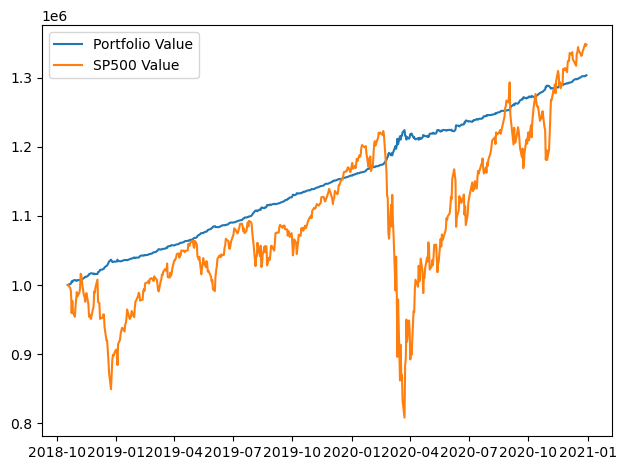

In [31]:
import matplotlib.pyplot as plt
  
# create data
x = dates
y1 = backtest1['Portfolio Value'].values
y2 = backtest1['SP500 Value'].values

# plot lines
plt.plot(x, y1, label = "Portfolio Value")
plt.plot(x, y2, label = "SP500 Value")
plt.legend()
plt.tight_layout()

plt.show()

In [32]:
# BackTest functions
def sharperatio(data):
    excess_return = data.mean() - RISK_FREE_RATE
    stddev = np.std(data)
    daily_sharpe = excess_return/stddev
    annualised_sharpe = daily_sharpe * np.sqrt(252)
    return daily_sharpe, annualised_sharpe

def drawdown_value(data):
    '''Calculates the drawdown duration and nominal value'''
    hwm = [0]
    idx = data.index
    drawdown = pd.Series(index = idx, dtype=float)
    duration = pd.Series(index = idx, dtype=float)
    for t in range(1, len(data)):
        cur_hwm = max(hwm[t-1], data[t])
        hwm.append(cur_hwm)
        drawdown[t]= hwm[t] - data[t]
        duration[t]= 0 if drawdown[t] == 0 else duration[t-1] + 1
    return drawdown.max(), duration.max()

def drawdowns(data):
    '''Calculates the percentage of drawdown and plot'''
    roll_max = data.rolling(window=backtest1.shape[0], min_periods=1).max()
    daily_drawdown = (data / roll_max) - 1.0
    max_daily_drawdown = daily_drawdown.rolling(window=1, min_periods=1).min()
    return max_daily_drawdown

def calmarratio(data):
    annualised_avg_return = data.mean() * 252
    max_dd = drawdowns(backtest1['Portfolio Value']).min()
    calmar = annualised_avg_return/ abs(max_dd)
    return calmar


----------------------------------------
# Back Test Key Results:
# Correlation: -0.9998347047825545
# CAPM Annualised Sharpe Ratio: 5.116
# Calmar Ratio: 10.625
# Max Drawdown ($): 13923.0
# Max Drawdown (%): -0.01137258638902161
# Max_dd_duration: 35.0
AxesSubplot(0.125,0.11;0.775x0.77)
----------------------------------------



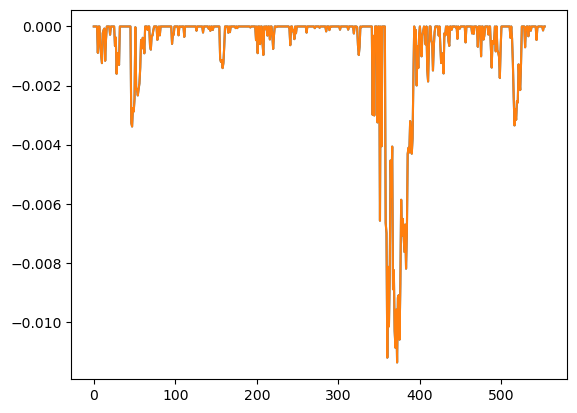

In [33]:
# Import relevant libraries
from scipy.stats import pearsonr

# Backtest Results
CR = round(calmarratio(backtest1['Portfolio Returns']),3)
Max_dd_value = round(drawdown_value(backtest1['Portfolio Value'])[0],0)
Max_dd_duration = drawdown_value(backtest1['Portfolio Value'])[1]
CAPM_AnnualS = round(sharperatio(backtest1['Portfolio Returns'])[1],3)
Max_dd_percentage = drawdowns(backtest1['Portfolio Value']).min()
drawdowns(backtest1['Portfolio Value']).plot()
Correlation , _ = pearsonr(backtest1['Portfolio Returns'], backtest1['SP500 Returns'])
Annualised_Returns = backtest1

backtest_result = f"""
{'-'*40}
# Back Test Key Results:
# Correlation: {Correlation}
# CAPM Annualised Sharpe Ratio: {CAPM_AnnualS}
# Calmar Ratio: {CR}
# Max Drawdown ($): {Max_dd_value}
# Max Drawdown (%): {Max_dd_percentage}
# Max_dd_duration: {Max_dd_duration}
{drawdowns(backtest1['Portfolio Value']).plot()}
{'-'*40}
"""

print(backtest_result)